In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('student_performance.csv')
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


# Basic Checks

In [3]:
df.shape

(10, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 852.0+ bytes


In [5]:
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


In [6]:
df.isnull().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

# EDA

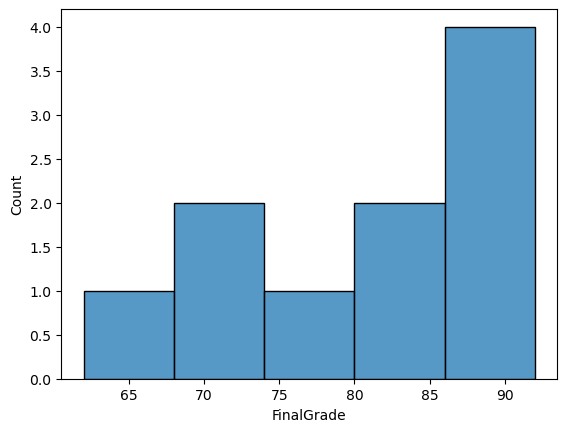

In [7]:
sns.histplot(x = df.FinalGrade)
plt.show()

## This is grade chart

# Encoding

In [8]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [9]:
df.ParentalSupport.value_counts()

High      4
Medium    3
Low       3
Name: ParentalSupport, dtype: int64

In [10]:
df['ParentalSupport'] = df.ParentalSupport.map({'High':2,'Medium':1,'Low':0})

In [11]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,2,80
1,2,Sarah,Female,90,20,85,2,1,87
2,3,Alex,Male,78,10,65,0,0,68
3,4,Michael,Male,92,25,90,3,2,92
4,5,Emma,Female,88,18,82,2,1,85


# Remove Unwanted Columns

In [12]:
col = ['Name','Gender']
df.drop(col,axis = 1,inplace = True)

In [13]:
df.head()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,85,15,78,1,2,80
1,2,90,20,85,2,1,87
2,3,78,10,65,0,0,68
3,4,92,25,90,3,2,92
4,5,88,18,82,2,1,85


# Spliting

In [14]:
x = df.drop('FinalGrade',axis=1)
y = df['FinalGrade']


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# import Random Forest Algorithm

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
rc = RandomForestRegressor()
rc.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
y1_pred = rc.predict(x_test)
y1_pred

array([74.16, 85.8 ])

# Mean Squared Error

In [19]:
mse = mean_squared_error(y_test,y1_pred)
mse

3.052799999999996

# Mean Absolute Error

In [20]:
mae = mean_absolute_error(y_test,y1_pred)
mae

1.6799999999999997

# R2 Score

In [21]:
r2 = r2_score(y_test,y1_pred)
r2

0.9457280000000001

# Adjusted R2 score

In [22]:
adj = 1-(1-0.9848888888888888)*(60-1)/(60-3-1)
adj

0.984079365079365

# I use this model in ipywidgets

In [23]:
x.columns

Index(['StudentID', 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
       'ExtracurricularActivities', 'ParentalSupport'],
      dtype='object')

In [24]:
import ipywidgets as widgets
from IPython.display import display

# create input widgets
student_id = widgets.Text(description = 'StudentID')
attendance_rate = widgets.FloatSlider(description = 'AttendanceRate', min = 0, max = 100)
study_hours = widgets.FloatSlider(description = 'StudyHoursPerWeek', min = 0, max = 50)
previous_grade = widgets.FloatSlider(description = 'PreviousGrade', min = 0, max = 100)
extracurricular_activities = widgets.Dropdown(description = 'ExtracurricularActivities', options = [0,1], value = 0)
parental_support = widgets.Dropdown(description = 'ParentalSupport', options = [0,1], value = 0)

# create Button
button = widgets.Button(description = 'predicted Final Grade')

display(student_id, attendance_rate, study_hours, previous_grade, extracurricular_activities, parental_support, button)

# Function

def on_button_click(b):
    input_data = np.array([[int(student_id.value),
                            attendance_rate.value,
                            study_hours.value,
                            previous_grade.value,
                            extracurricular_activities.value,
                            parental_support.value]])
    
    
    prediction = rc.predict(input_data)

    print(f'predicted Final Grade:{prediction[0]}')

button.on_click(on_button_click)

Text(value='', description='StudentID')

FloatSlider(value=0.0, description='AttendanceRate')

FloatSlider(value=0.0, description='StudyHoursPerWeek', max=50.0)

FloatSlider(value=0.0, description='PreviousGrade')

Dropdown(description='ExtracurricularActivities', options=(0, 1), value=0)

Dropdown(description='ParentalSupport', options=(0, 1), value=0)

Button(description='predicted Final Grade', style=ButtonStyle())